# <center>Regression: Predicting Bike Rental Demand</center>
<center><img src="./images/seoul_bikes.jpg" style="height: 350px;"/></center>

# <a id='0'>Contents of Project</a>
<a href='#0.0'>Project Summary</a>
- <a href='#1.0'>1. Dataset</a>
    - <a href='#1.1'>1.1 Dataset Information</a>
    - <a href='#1.2'>1.2 Attribute Information</a>
    - <a href='#1.3'>1.3 Dataset Comments</a>
    - <a href='#1.3'>1.4 Dataset Summary</a>
- <a href='#2.0'>2. Problem Definition</a>
- <a href='#3.0'>3. Exploratory Data Analysis</a>
    - <a href='#3.1'>3.1 Data Preparation</a>
    - <a href='#3.2'>3.2 Pearson Correlation Plot</a>
        - <a href='#3.2.1'>3.2.1 Pearson Correlation Plot Observations</a>
    - <a href='#3.3'>3.3 Boxplots</a>
        - <a href='#3.3.1'>3.3.1 Boxplot Observations</a>
    - <a href='#3.4'>3.4 Barcharts</a>
        - <a href='#3.4.1'>3.4.1 Barchart Observations</a>
    - <a href='#3.5'>3.5 Interactions</a>
        - <a href='#3.5.1'>3.5.1 Weekday*Hour Observation</a>
        - <a href='#3.5.2'>3.5.2 Holiday*Hour Observation</a>
    - <a href='#3.6'>3.6 Conclusions from EDA</a>
- <a href='#4.0'>4. Regression Modeling</a>
    - <a href='#4.1'>4.1 Candidate Models</a>
    - <a href='#4.2'>4.2 Modeling Setup</a>
    - <a href='#4.3'>4.3 Multiple Linear Regression</a>
    - <a href='#4.4'>4.4 Support Vector Regression</a>
    - <a href='#4.5'>4.5 Decision Tree Regression</a>
    - <a href='#4.6'>4.6 Ensemble Method Regression (Random Forest)</a>
    - <a href='#4.7'>4.7 Neural Network Regression</a>
    - <a href='#4.8'>4.8 Modeling Results</a>
- <a href='#5.0'>5. Closing Comments</a>

# <a id='0.0'> Project Summary</a>

For this project, I use the 'Bike Sharing Demand' dataset from the UCI Machine Learning Repository (found [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand)) for the purposes of regression modeling. I consider 5 regression models, with some having hyperparameter tuning performed (via nested cross-validation). 

**The winning regressor is a Random Forest with a R2 score of ~0.85.**

# <a id='1.0'>1. Dataset</a>

## <a id='1.1'>1.1 Dataset Information</a>
(from UCI Machine Learning Repository):\
*Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern.* ***The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.***

*The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.*

## <a id='1.2'>1.2 Attribute Information</a>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## <a id='1.3'>1.3 Dataset Comments</a>
Since capacity is not known, the scope of the project is not to say if there should be more bikes or less (or indeed by how much) as the data that would help is not available (capacity % - not provided; would be users missing out on a bike - not collected).\
Therefore, the scope is to predict bike count at a specific time (depending on conditions).

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Check encoding of dataset
filename = './input/SeoulBikeData.csv'
import chardet
with open(filename, 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
#Import into pandas df
data_df = pd.read_csv(filename, encoding = 'ISO-8859-1')

In [4]:
#check data types
data_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [5]:
data_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
data_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Null values - check (although documentation says no missing values)
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Summary stats on dataframe
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## <a id='1.4'>1.4 Dataset Summary</a>
* 14 Columns
* 8,760 Observations (24 hours * 365 days)
* No "missing values", however, minimum of Rented Bike Count is 0 (related to non-functional hours)

On this last point, it is unclear if bikes couldn't be, and therefore weren't, rented or if recording of data was not collected.

# <a id='2.0'>2. Problem Definition</a>
**The prediction of bike count required at each hour for the stable supply of rental bikes.**

# <a id='3.0'>3. Exploratory Data Analysis</a>

## <a id='3.1'>3.1 Data Preparation</a>

In [9]:
# Convert Date from String to Dateobject
from datetime import datetime
data_df['Date'] = list(map(lambda x: datetime.strptime(x,'%d/%m/%Y').date(), data_df['Date']))

In [10]:
# Rename columns
data_df.rename(columns={'Date':'date',
                       'Rented Bike Count':'bike_ct',
                       'Hour':'hour',
                       'Temperature(°C)':'temperature',
                       'Humidity(%)':'humidity',
                       'Wind speed (m/s)':'wind_speed',
                       'Visibility (10m)':'visibility',
                       'Dew point temperature(°C)':'dew_point',
                       'Solar Radiation (MJ/m2)':'solar_radiation',
                       'Rainfall(mm)':'rainfall',
                       'Snowfall (cm)':'snowfall',
                       'Seasons':'season',
                       'Holiday':'holiday',
                       'Functioning Day':'functioning_day',
                       'Datetime':'datetime'},inplace=True)

In [11]:
# Sort dataset
data_df.sort_values(by=['date','hour'], inplace=True)

In [12]:
# Create a single column with date and time as a datetime object
data_df['datetime'] = data_df['date'].astype(str) + ' ' + data_df['hour'].astype(str).apply(lambda x: x.zfill(2))
data_df['datetime'] = list(map(lambda x: datetime.strptime(x,'%Y-%m-%d %H'), data_df['datetime']))

In [13]:
# Weekday
from datetime import date
data_df['weekday'] = list(map(lambda x: int(date.weekday(x) in (0,1,2,3,4)), data_df['date']))
# Day of Week
data_df['day_of_week'] = list(map(lambda x: int(date.weekday(x)), data_df['date']))
# Month
data_df['month'] = list(map(lambda x: int(x.strftime('%m')), data_df['date']))

## <a id='3.2'>3.2 Pearson Correlation Plot</a>

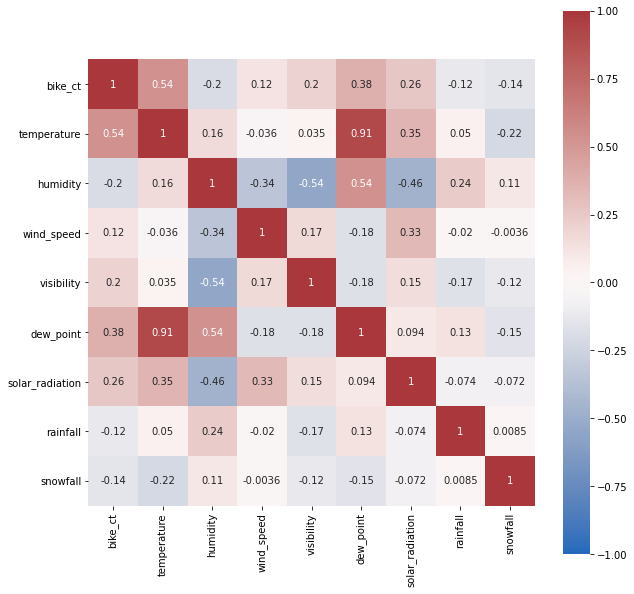

In [14]:
pearson_vars = ['bike_ct','temperature','humidity','wind_speed','visibility','dew_point','solar_radiation','rainfall','snowfall']
pearson_df = data_df[pearson_vars]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(pearson_df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='vlag',
            annot=True, 
            square=True);

### <a id='3.2.1'>3.2.1 Pearson Correlation Plot Observations</a>
* Dewpoint and Temperature clearly correlated
* Humidity borderline correlated with Dew Point (positively) and Visibility (inversely)

## <a id='3.3'>3.3 Boxplots</a>

<Figure size 432x288 with 0 Axes>

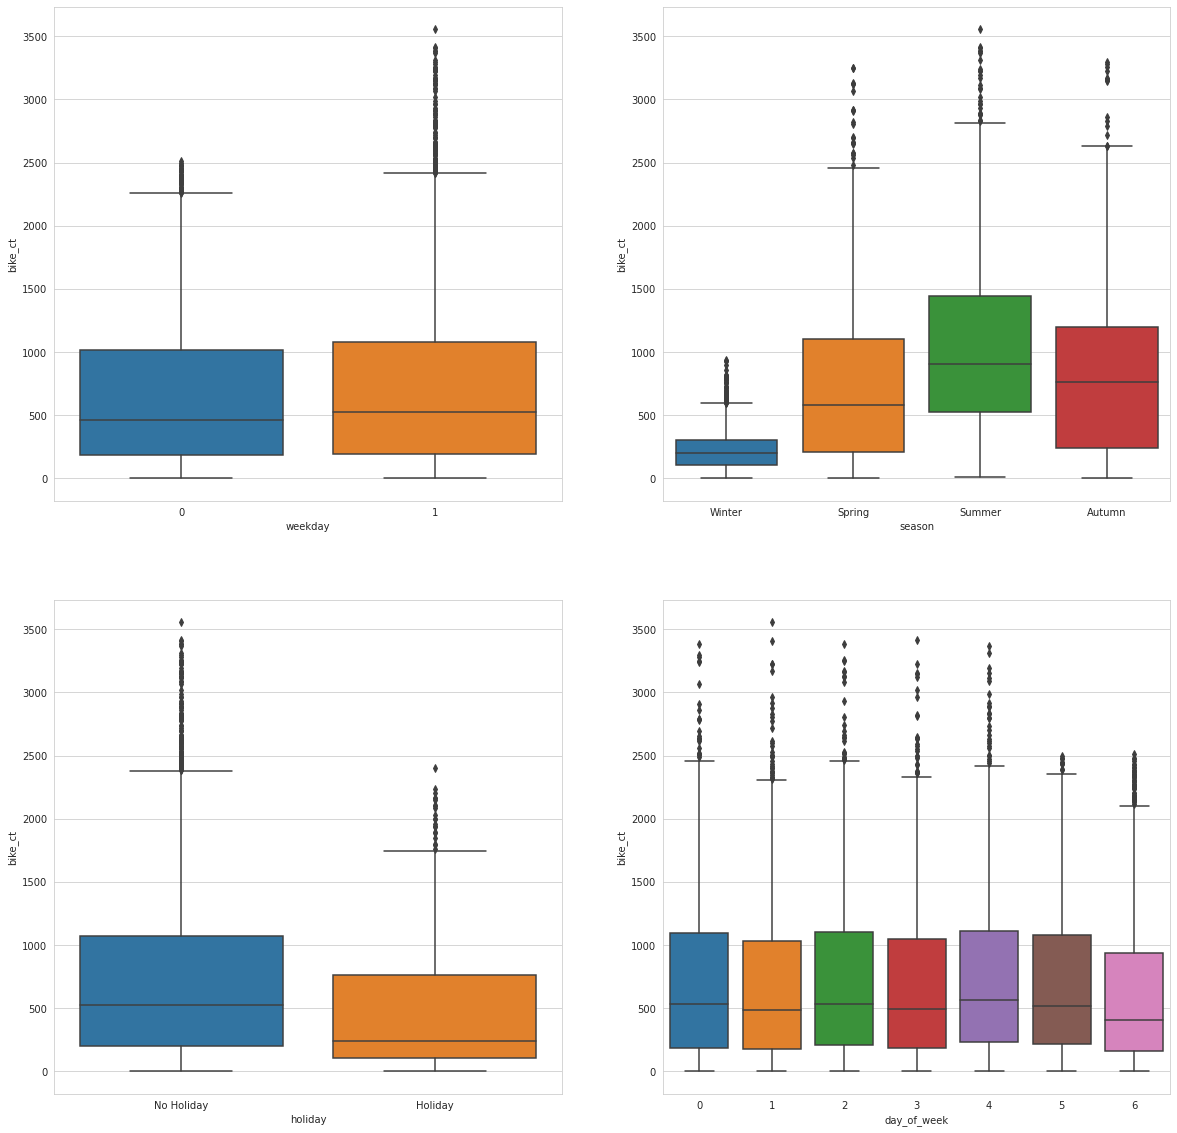

In [15]:
boxplot_vars = ['weekday','season','holiday','bike_ct','day_of_week']
boxplot_df = data_df[boxplot_vars]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(2,2,figsize=(20,20))
i=0
for var in ['weekday','season','holiday','day_of_week']:
    i += 1
    plt.subplot(2,2,i)
    sns.boxplot(x=var, y='bike_ct', data=boxplot_df)
plt.show()

### <a id='3.3.1'>3.3.1 Boxplot Observations</a>
* Not much difference between the medians of Weekday vs Weekend (I expect their means to be different as Weekday has more extreme values than Weekends)
* Demand follows the seasons (correlated to more favourable temperatures for cycling).
* A noticeable difference between demand on a Non-Holiday day vs a Holiday day.
* Sunday shows lowest demand.

The first observation and last observation suggests bike demand for commuting purposes. A plot of demand vs hour of day will confirm this.

## <a id='3.4'>3.4 Barcharts</a>

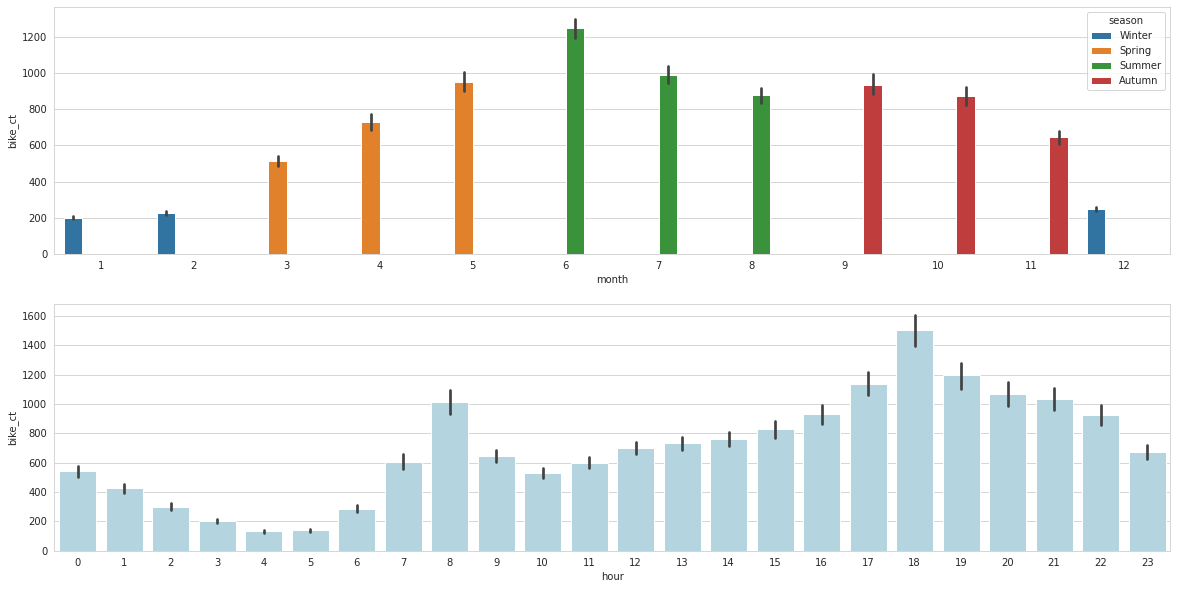

In [16]:
barchart_vars = ['hour','month','season','bike_ct']
barchart_df = data_df[barchart_vars]

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 1, figsize=(20,10))

# Month
sns.barplot(data=barchart_df,
            ax = ax[0],
            x='month',
            y='bike_ct',
            hue='season'
               );
# Day
sns.barplot(data=barchart_df,
            ax = ax[1],
            x='hour',
            y='bike_ct',
            color = 'lightblue'
               );

### <a id='3.4.1'>3.4.1 Barchart Observations</a>
* Hourly barchart confirms demand peaks twice-a-day, specifically around 8am and 6pm (going-to-work, coming-home-from-work).

Investigate if there are two interactions: 1) Weekday\*Hour and Bike Count 2) Holiday\*Hour and Bike Count.

## <a id='3.5'>3.5 Interactions</a>

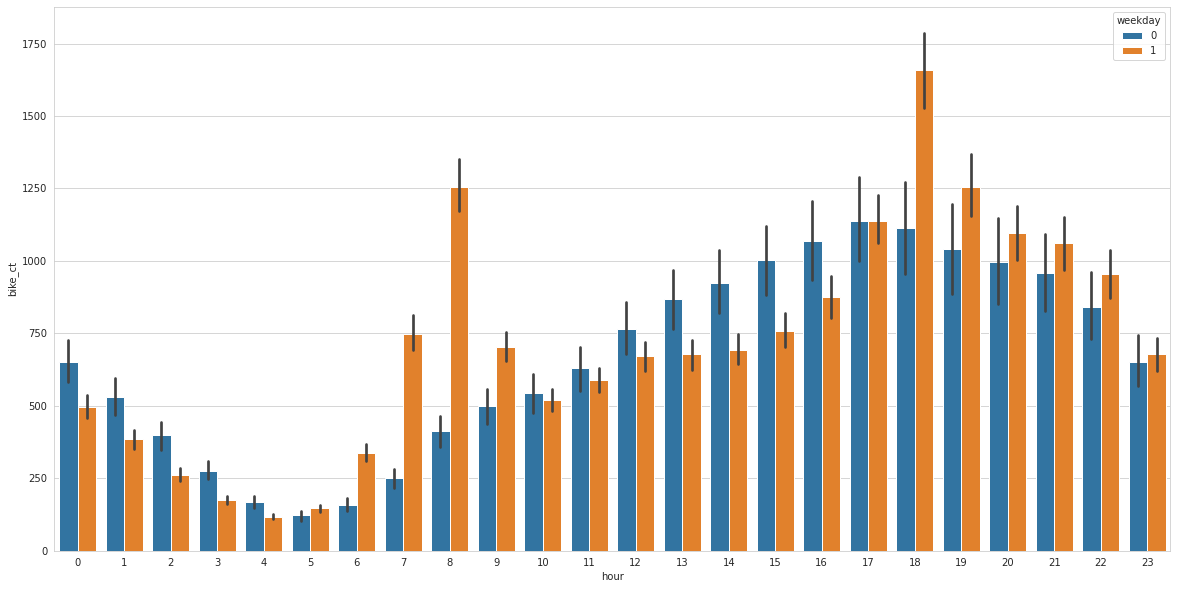

In [17]:
int1_vars = ['weekday','hour','bike_ct']
int1_df = data_df[int1_vars]

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
sns.barplot(data=int1_df,
            x='hour',
            y='bike_ct',
            hue = 'weekday'
               );

### <a id='3.5.1'>3.5.1 Weekday*Hour Observation</a>
* For weekdays, hours 5am to 9am and 6pm to 11pm, show more demand than weekends.

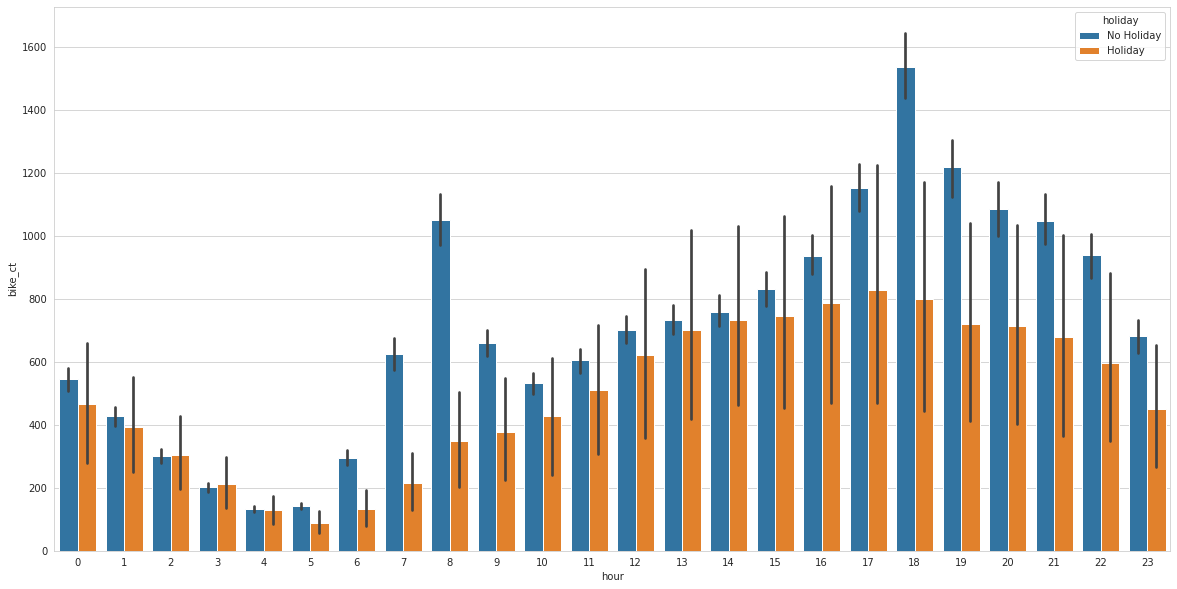

In [18]:
int2_vars = ['holiday','hour','bike_ct']
int2_df = data_df[int2_vars]

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
sns.barplot(data=int2_df,
            x='hour',
            y='bike_ct',
            hue = 'holiday'
               );

### <a id='3.5.2'>3.5.2 Holiday*Hour Observation</a>
* With the exception of 2am and 3am, holiday days show lower demand at all hours compared to non-holiday days.

In [19]:
# Interactions
data_df['weekday_hour'] = data_df['weekday'] * data_df['hour']
data_df['holiday'] = list(map(lambda x: int(x=='Holiday'), data_df['holiday']))
data_df['holiday_hour'] = data_df['holiday'] * data_df['hour']

## <a id='3.6'>3.6 Conclusions from EDA</a>

* Temperature and Dew Point are highly correlated (this will need to be accounted for when building a regression model)
* Average demand is higher on weekdays compared to weekends
* Holidays see lower demand on average compared to non-Holiday days
* Temperature (and therefore Season) plays a factor in demand, higher the temperature, greater the demand
* Demand is higher around 8am and 6pm for purposes of commuting
* Rentals are zero on non functioning days
* Possible interaction effects influencing rentals 1) weekday * hour and 2) holiday * hour

# <a id='4.0'>4. Regression Modeling</a>

## <a id='4.1'>4.1 Candidate Models</a>

To predict the bike count I shall use the following models as candidates:
* Multiple Linear Regression
* Support Vector Regression
* Decision Tree Regression
* Ensemble Method Regression
* Neural Network Regression

## <a id='4.2'>4.2 Modeling Setup</a>

In [20]:
from sklearn import linear_model, svm
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from numpy import mean, std, sqrt
RANDOM_SEED = 42

In [21]:
X = data_df.drop(columns=['bike_ct','functioning_day','date','season','datetime','dew_point'],axis=1)
Y = data_df['bike_ct']

In [22]:
# Regression Results Dictionary
results_df = pd.DataFrame(columns=['Regressor','R2 Score','RMSE'])

In [23]:
N_OUTER_SLPITS = 5
N_REPEATS = 3
# cv_outer = RepeatedKFold(n_splits=N_OUTER_SLPITS, n_repeats=N_REPEATS, random_state=RANDOM_SEED)
cv_outer = KFold(n_splits=N_OUTER_SLPITS, shuffle=True, random_state=RANDOM_SEED)

## <a id='4.3'>4.3 Multiple Linear Regression</a>

In [24]:
%%time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)
# Add RFE
rfecv = RFECV(estimator=DecisionTreeRegressor())
model = linear_model.LinearRegression(fit_intercept=False)
pipeline = Pipeline(steps=[('s',rfecv),('m',model)])
# evaluate model
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv_outer, n_jobs=-1, error_score='raise')
# report performance
print('CV RMSE score: %.3f (%.3f)' % (mean(n_scores)*-1, std(n_scores)))

pipeline.fit(X_train,Y_train)
Y_mlr_hat = pipeline.predict(X_test)
mlr_rmse_score = sqrt(mean_squared_error(Y_test, Y_mlr_hat))
mlr_r2_score = r2_score(Y_test, Y_mlr_hat)
print('Test-set RMSE score: %.3f' % mlr_rmse_score)
print('Test-set R2 score: %.3f' % mlr_r2_score)

CV RMSE score: 469.212 (8.544)
Test-set RMSE score: 472.468
Test-set R2 score: 0.464
CPU times: user 2.21 s, sys: 84.1 ms, total: 2.3 s
Wall time: 8.29 s


In [25]:
print('No of features used: ',rfecv.n_features_)
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df

No of features used:  12


,Rank
hour,1
temperature,1
humidity,1
wind_speed,1
visibility,1
solar_radiation,1
rainfall,1
weekday,1
day_of_week,1
month,1


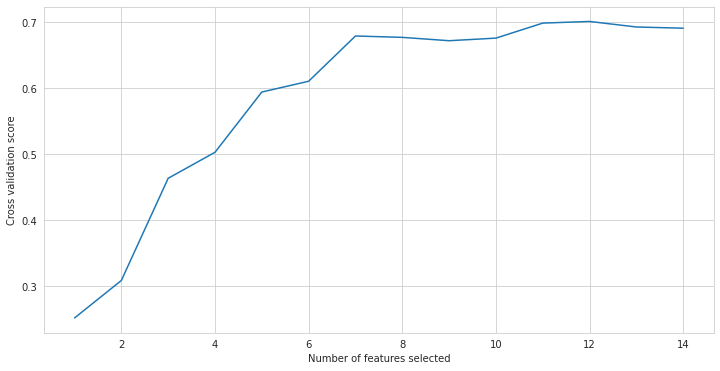

array([0.25200305, 0.30875464, 0.46345187, 0.50283144, 0.59403768,
       0.6103896 , 0.67890144, 0.67682002, 0.67174283, 0.675688  ,
       0.69840916, 0.70089209, 0.69251377, 0.69069994])

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
rfecv.grid_scores_

In [27]:
# Data Frame of Coefficients
mlr_coef_df = pd.DataFrame(data={'Feature': list(X.columns[rfecv.support_]), 'coefficient': model.coef_})
new_row = {'Feature':'Intercept', 'coefficient':model.intercept_}
mlr_coef_df = mlr_coef_df.append(new_row, ignore_index=True)
print(mlr_coef_df)

            Feature  coefficient
0              hour    28.704708
1       temperature    29.716571
2          humidity    -5.363169
3        wind_speed    17.733581
4        visibility     0.060878
5   solar_radiation   -60.180473
6          rainfall   -63.650333
7           weekday   116.982505
8       day_of_week    20.078579
9             month    10.409455
10     weekday_hour     2.479133
11     holiday_hour   -15.298781
12        Intercept     0.000000


In [28]:
results_df = results_df.append({'Regressor':'Multiple Linear Regression','R2 Score':mlr_r2_score,'RMSE':mlr_rmse_score}, ignore_index=True)

## <a id='4.4'>4.4 Support Vector Regression</a>

In [29]:
%%time
N_INNER_SPLITS = 3
# enumerate splits
svr_r2_outer_results = list()
svr_rmse_outer_results = list()
for train_ix, test_ix in cv_outer.split(X, Y):
    #split data
    X_train, X_test = X.iloc[train_ix,:], X.iloc[test_ix,:]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=N_INNER_SPLITS, shuffle=True, random_state=RANDOM_SEED)
    
    # configure pipeline
    scaler = StandardScaler()
    rfecv = RFECV(estimator=DecisionTreeRegressor())
    model = svm.SVR()
    pipeline = Pipeline(steps=[('s',scaler),('rfe',rfecv),('m',model)])
    
    # hyperparameters
    kernel_options = ['rbf']
    C_options = [100,1000,10000]
        
    # parameter grid
    param_grid = [
        {
            'm__kernel': kernel_options,
            'm__C': C_options
        }
    ]
    
    # define search
    search = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=cv_inner
                         )
    # execute search
    result = search.fit(X_train, Y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    r2_score_n = r2_score(Y_test,yhat)
    svr_r2_outer_results.append(r2_score_n)
    rmse_score_n = sqrt(mean_squared_error(Y_test,yhat))
    svr_rmse_outer_results.append(rmse_score_n)
    
    # report progress
    print('R2 Score: %.3f, RMSE: %.3f, est=%.3f, cfg=%s' % (r2_score_n, rmse_score_n, result.best_score_, result.best_params_))
    
# summarize the estimated performance of the model
print('R2 Score: %.3f (%.3f), RMSE: %.3f (%.3f)' % (mean(svr_r2_outer_results), std(svr_r2_outer_results), mean(svr_rmse_outer_results), std(svr_rmse_outer_results)))

results_df = results_df.append({'Regressor':'Support Vector Regression','R2 Score':mean(svr_r2_outer_results),'RMSE':mean(svr_rmse_outer_results)}, ignore_index=True)

R2 Score: 0.757, RMSE: 318.466, est=-331.344, cfg={'m__C': 10000, 'm__kernel': 'rbf'}
R2 Score: 0.749, RMSE: 321.948, est=-332.425, cfg={'m__C': 10000, 'm__kernel': 'rbf'}
R2 Score: 0.679, RMSE: 366.723, est=-322.288, cfg={'m__C': 10000, 'm__kernel': 'rbf'}
R2 Score: 0.790, RMSE: 294.354, est=-342.983, cfg={'m__C': 10000, 'm__kernel': 'rbf'}
R2 Score: 0.741, RMSE: 328.743, est=-323.438, cfg={'m__C': 10000, 'm__kernel': 'rbf'}
R2 Score: 0.743 (0.036), RMSE: 326.047 (23.412)
CPU times: user 4min 35s, sys: 2.64 s, total: 4min 38s
Wall time: 4min 38s


In [30]:
# # without hyperparameter tuning
# model = svm.SVR()
# pipeline = Pipeline(steps=[('s',rfecv),('m',model)])
# # evaluate model
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('CV RMSE score: %.3f (%.3f)' % (mean(n_scores)*-1, std(n_scores)))

# pipeline.fit(X_train,Y_train)
# Y_svr_hat = pipeline.predict(X_test)
# svr_rmse_score = sqrt(mean_squared_error(Y_test, Y_svr_hat))
# svr_r2_score = r2_score(Y_test, Y_svr_hat)
# print('Test-set RMSE score: %.3f' % svr_rmse_score)
# print('Test-set R2 score: %.3f' % svr_r2_score)

# results_df = results_df.append({'Regressor':'Support Vector Regression','R2 Score':svr_r2_score,'RMSE':svr_rmse_score}, ignore_index=True)

## <a id='4.5'>4.5 Decision Tree Regression</a>

In [31]:
%%time
N_INNER_SPLITS = 3
# enumerate splits
dt_r2_outer_results = list()
dt_rmse_outer_results = list()
for train_ix, test_ix in cv_outer.split(X, Y):
    #split data
    X_train, X_test = X.iloc[train_ix,:], X.iloc[test_ix,:]
    Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
    # configure the cross-validation procedure
    cv_inner = KFold(n_splits=N_INNER_SPLITS, shuffle=True, random_state=RANDOM_SEED)
    
    # configure pipeline
    scaler = StandardScaler()
    rfecv = RFECV(estimator=DecisionTreeRegressor())
    model = DecisionTreeRegressor()
    pipeline = Pipeline(steps=[('s',scaler),('rfe',rfecv),('m',model)])
    
    # hyperparameters
    max_depth_options = [1,2,5,8,10,20]
            
    # parameter grid
    param_grid = [
        {
            'm__max_depth': max_depth_options
        }
    ]
    
    # define search
    search = GridSearchCV(estimator=pipeline,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=cv_inner
                         )
    # execute search
    result = search.fit(X_train, Y_train)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    r2_score_n = r2_score(Y_test,yhat)
    dt_r2_outer_results.append(r2_score_n)
    rmse_score_n = sqrt(mean_squared_error(Y_test,yhat))
    dt_rmse_outer_results.append(rmse_score_n)
    
    # report progress
    print('R2 Score: %.3f, RMSE: %.3f, est=%.3f, cfg=%s' % (r2_score_n, rmse_score_n, result.best_score_, result.best_params_))

# summarize the estimated performance of the model
print('R2 Score: %.3f (%.3f), RMSE: %.3f (%.3f)' % (mean(dt_r2_outer_results), std(dt_r2_outer_results), mean(dt_rmse_outer_results), std(dt_rmse_outer_results)))

results_df = results_df.append({'Regressor':'Decision Tree Regression','R2 Score':mean(dt_r2_outer_results),'RMSE':mean(dt_rmse_outer_results)}, ignore_index=True)

R2 Score: 0.674, RMSE: 368.324, est=-339.403, cfg={'m__max_depth': 8}
R2 Score: 0.761, RMSE: 314.480, est=-351.976, cfg={'m__max_depth': 8}
R2 Score: 0.665, RMSE: 374.737, est=-355.718, cfg={'m__max_depth': 8}
R2 Score: 0.706, RMSE: 348.804, est=-357.755, cfg={'m__max_depth': 10}
R2 Score: 0.711, RMSE: 347.105, est=-345.265, cfg={'m__max_depth': 8}
R2 Score: 0.703 (0.034), RMSE: 350.690 (21.056)
CPU times: user 2min 31s, sys: 14.9 ms, total: 2min 32s
Wall time: 2min 32s


In [32]:
# # wihtout hyperparameter search
# scaler = StandardScaler()
# model = DecisionTreeRegressor()
# pipeline = Pipeline(steps=[('x',scaler),('s',rfecv),('m',model)])

# # evaluate model
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('CV RMSE score: %.3f (%.3f)' % (mean(n_scores)*-1, std(n_scores)))

# pipeline.fit(X_train,Y_train)
# Y_DT_hat = pipeline.predict(X_test)
# DT_rmse_score = sqrt(mean_squared_error(Y_test, Y_DT_hat))
# DT_r2_score = r2_score(Y_test, Y_DT_hat)
# print('Test-set RMSE score: %.3f' % DT_rmse_score)
# print('Test-set R2 score: %.3f' % DT_r2_score)

# results_df = results_df.append({'Regressor':'Decision Tree Regression','R2 Score':DT_r2_score,'RMSE':DT_rmse_score}, ignore_index=True)

## <a id='4.6'>4.6 Ensemble Method Regression (Random Forest)</a>

In [33]:
# %%time
# N_INNER_SPLITS = 3
# # enumerate splits
# rf_r2_outer_results = list()
# rf_rmse_outer_results = list()
# for train_ix, test_ix in cv_outer.split(X, Y):
#     #split data
#     X_train, X_test = X.iloc[train_ix,:], X.iloc[test_ix,:]
#     Y_train, Y_test = Y.iloc[train_ix], Y.iloc[test_ix]
    
#     # configure the cross-validation procedure
#     cv_inner = KFold(n_splits=N_INNER_SPLITS, shuffle=True, random_state=RANDOM_SEED)
    
#     # configure pipeline
#     scaler = StandardScaler()
#     rfecv = RFECV(estimator=DecisionTreeRegressor())
#     model = RandomForestRegressor()
#     pipeline = Pipeline(steps=[('s',scaler),('rfe',rfecv),('m',model)])
    
#     # hyperparameters
#     n_estimators_options = [int(x) for x in np.linspace(start=10,stop=100, num=10)]
#     max_depth_options = [60,70,80,90,100]
#     bootstrap_options = [True]
#     min_samples_leaf_options = [1,2,3]
    
              
#     # parameter grid
#     param_grid = [
#         {
#             'm__n_estimators': n_estimators_options,
#             'm__max_depth': max_depth_options,
#             'm__bootstrap': bootstrap_options,
#             'm__min_samples_leaf': min_samples_leaf_options
#         }
#     ]
    
#     # define search
#     search = GridSearchCV(estimator=pipeline,
#                           param_grid=param_grid,
#                           scoring='neg_root_mean_squared_error',
#                           cv=cv_inner
#                          )
#     # execute search
#     result = search.fit(X_train, Y_train)
#     # get the best performing model fit on the whole training set
#     best_model = result.best_estimator_
#     # evaluate model on the hold out dataset
#     yhat = best_model.predict(X_test)
#     r2_score_n = r2_score(Y_test,yhat)
#     rf_r2_outer_results.append(r2_score_n)
#     rmse_score_n = sqrt(mean_squared_error(Y_test,yhat))
#     rf_rmse_outer_results.append(rmse_score_n)
    
#     # report progress
#     print('R2 Score: %.3f, RMSE: %.3f, est=%.3f, cfg=%s' % (r2_score_n, rmse_score_n, result.best_score_, result.best_params_))
    
# # summarize the estimated performance of the model
# print('R2 Score: %.3f (%.3f), RMSE: %.3f (%.3f)' % (mean(rf_r2_outer_results), std(rf_r2_outer_results), mean(rf_rmse_outer_results), std(rf_rmse_outer_results)))

#results_df = results_df.append({'Regressor':'Random Forest Regression','R2 Score':mean(rf_r2_outer_results),'RMSE':mean(rf_rmse_outer_results)}, ignore_index=True)

In [34]:
# without hyperparameter tuning
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)
model = RandomForestRegressor()
pipeline = Pipeline(steps=[('x',scaler),('s',rfecv),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=N_OUTER_SLPITS, n_repeats=N_REPEATS, random_state=RANDOM_SEED)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('CV RMSE score: %.3f (%.3f)' % (mean(n_scores)*-1, std(n_scores)))

pipeline.fit(X_train,Y_train)
Y_rf_hat = pipeline.predict(X_test)
rf_rmse_score = sqrt(mean_squared_error(Y_test, Y_rf_hat))
rf_r2_score = r2_score(Y_test, Y_rf_hat)
print('Test-set RMSE score: %.3f' % rf_rmse_score)
print('Test-set R2 score: %.3f' % rf_r2_score)

results_df = results_df.append({'Regressor':'Random Forest Regression','R2 Score':rf_r2_score,'RMSE':rf_rmse_score}, ignore_index=True)

CV RMSE score: 257.076 (15.701)
Test-set RMSE score: 249.064
Test-set R2 score: 0.851


## <a id='4.7'>4.7 Neural Network Regression</a>

In [35]:
# without hyperparameter tuning
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)
model = MLPRegressor()
pipeline = Pipeline(steps=[('x',scaler),('s',rfecv),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=N_OUTER_SLPITS, n_repeats=N_REPEATS, random_state=RANDOM_SEED)
n_scores = cross_val_score(pipeline, X_train, Y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('CV RMSE score: %.3f (%.3f)' % (mean(n_scores)*-1, std(n_scores)))

pipeline.fit(X_train,Y_train)
Y_NN_hat = pipeline.predict(X_test)
NN_rmse_score = sqrt(mean_squared_error(Y_test, Y_NN_hat))
NN_r2_score = r2_score(Y_test, Y_NN_hat)
print('Test-set RMSE score: %.3f' % NN_rmse_score)
print('Test-set R2 score: %.3f' % NN_r2_score)

results_df = results_df.append({'Regressor':'Neural Network Regression','R2 Score':NN_r2_score,'RMSE':NN_rmse_score}, ignore_index=True)

CV RMSE score: 431.104 (12.499)
Test-set RMSE score: 426.320
Test-set R2 score: 0.564


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## <a id='4.8'>4.8 Modeling Results</a>

In [36]:
results_df.sort_values(by='R2 Score', ascending=False, inplace=True)
results_df

,Regressor,R2 Score,RMSE
3,Random Forest Regression,0.851113,249.064431
1,Support Vector Regression,0.743216,326.046910
2,Decision Tree Regression,0.703354,350.689860
4,Neural Network Regression,0.563781,426.320324
0,Multiple Linear Regression,0.464231,472.468249


# <a id='5.0'>5. Closing Comments</a>

* The ensemble method of **Random Forests** won out compared to the rest of the models with a R2 score ~0.85. 

* The Neural Network failed to converge and so it's results should be ignored. 

* Multiple Linear Regression peformed the worst.

* If more computing resource was available, a hyperparameter search for Random Forest and Neural Network could be performed which could change the results.

* A time-series model could also be considered as most of these variables are serially correlated. The weather variables could be modeled using a vector autoregression (VAR) model (since each of the variables influence each other) and this VAR model could be used as an input for (maybe) an ARIMA model for Bike Rental Demand.